<a href="https://colab.research.google.com/github/CalebEng/Ai-Project-learning/blob/master/Ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#imports
import torch
import torch.nn as nn
from torch.nn import functional as F
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

!pip install pyyaml h5py
import numpy as np


!pip install --upgrade tiktoken
import tiktoken
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Ai work')
#torch.__version__
enc = tiktoken.encoding_for_model('gpt-3.5-turbo')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



------------------- Prep and loading data sets -------------------

--ONLY RUN THE NEXT IF CSV FILE CONTAINING CONVOS HAS A INDEX COLUMN--

In [6]:
import pandas as pd
df = pd.read_csv('poems.csv')
# If you know the name of the column skip this
first_column = df.columns[0]
sec_col = df.columns[2]
trd_col = df.columns[3]
four_col = df.columns[4]

# Delete first
df = df.drop([first_column], axis=1)
df = df.drop([sec_col],axis=1)
df = df.drop([trd_col],axis = 1)
df = df.drop([four_col],axis = 1)


df.to_csv('poem.csv',index = False)


In [4]:
df.to_csv('poems.csv',index=False)

NameError: ignored

In [7]:
df = pd.read_csv('poem.csv')

In [8]:
stdf = df['content'].tolist()
print(len(stdf))

573


In [4]:

df2 = pd.read_csv('Conversation.csv')

questions = df2['question'].tolist()
answers = df2['answer'].tolist()

temp = map(format, questions)
temp2 = map(format, answers)

questions = list(temp)
answers = list(temp2)


--EXIT--

In [60]:
poems=""
for i in stdf[:200]:
  poems+=i
  poems+="\n"
poems=poems[:-1]

print(poems)

Let the bird of loudest lay
On the sole Arabian tree
Herald sad and trumpet be,
To whose sound chaste wings obey.

But thou shrieking harbinger,
Foul precurrer of the fiend,
Augur of the fever's end,
To this troop come thou not near.

From this session interdict
Every fowl of tyrant wing,
Save the eagle, feather'd king;
Keep the obsequy so strict.

Let the priest in surplice white,
That defunctive music can,
Be the death-divining swan,
Lest the requiem lack his right.

And thou treble-dated crow,
That thy sable gender mak'st
With the breath thou giv'st and tak'st,
'Mongst our mourners shalt thou go.

Here the anthem doth commence:
Love and constancy is dead;
Phoenix and the Turtle fled
In a mutual flame from hence.

So they lov'd, as love in twain
Had the essence but in one;
Two distincts, division none:
Number there in love was slain.

Hearts remote, yet not asunder;
Distance and no space was seen
'Twixt this Turtle and his queen:
But in them it were a wonder.

So between them love di

--Padding and turning data into tensors--

Dont use


In [ ]:
df = pd.read_csv('Conversation.csv')

temp1 = df['question'].tolist()
temp2 = df['answer'].tolist()

def format(x):
  y=enc.encode(x)
  return y

qT = list(map(format, temp1))
aT = list(map(format, temp2))

for i in range(0,len(qT)):
  if len(qT[i])<25:
    while len(qT[i])<25:
      qT[i].append(482)


for i in range(0,len(aT)):
  if len(aT[i])<25:
    while len(aT[i])<25:
      aT[i].append(482)

lists = [qT,aT]
data = [val for tup in zip(*lists) for val in tup]







use


In [61]:
tokenizer = Tokenizer()
poems.replace("\c","")
poems.replace("\t","")
corpus = poems.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1



In [62]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [63]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding = 'pre'))



In [64]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [65]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [66]:
model = Sequential()

model.add(Embedding(total_words,240,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs,ys,epochs=100, verbose = 1)

print(model)

Epoch 1/100
1377/1377 [==============================] - 55s 35ms/step - loss: 7.3042 - accuracy: 0.1186
Epoch 2/100
1377/1377 [==============================] - 27s 20ms/step - loss: 6.7876 - accuracy: 0.1352
Epoch 3/100
1377/1377 [==============================] - 25s 18ms/step - loss: 5.7337 - accuracy: 0.1556
Epoch 4/100
1377/1377 [==============================] - 26s 19ms/step - loss: 5.1104 - accuracy: 0.1803
Epoch 5/100
1377/1377 [==============================] - 24s 18ms/step - loss: 4.7350 - accuracy: 0.2065
Epoch 6/100
1377/1377 [==============================] - 25s 18ms/step - loss: 4.4410 - accuracy: 0.2308
Epoch 7/100
1377/1377 [==============================] - 24s 17ms/step - loss: 4.1873 - accuracy: 0.2502
Epoch 8/100
1377/1377 [==============================] - 24s 17ms/step - loss: 4.0155 - accuracy: 0.2709
Epoch 9/100
1377/1377 [==============================] - 25s 18ms/step - loss: 3.9260 - accuracy: 0.2785
Epoch 10/100
1377/1377 [==============================]

Show accuracy

In [67]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

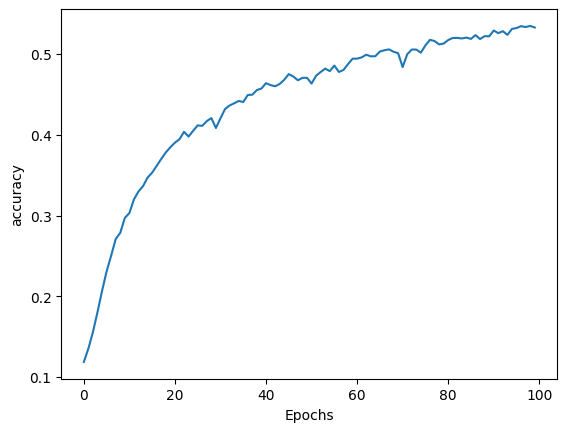

In [68]:
plot_graphs(history, 'accuracy')

In [69]:
model.save('poet.keras')

In [76]:
seed_text = "I've got a bad feeling about this"
temp = ""
next_words = 20

for i in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    temp+=f" {word}"
    if index == predicted:
      output_word = word
      break
  seed_text += f" {output_word}"


print(len(seed_text))

1/1 [==============================] - 0s 47ms/step
soul
1/1 [==============================] - 0s 50ms/step
know
1/1 [==============================] - 0s 46ms/step
caught
1/1 [==============================] - 0s 63ms/step
in
1/1 [==============================] - 0s 43ms/step
vaine
1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 28ms/step
loose
1/1 [==============================] - 0s 28ms/step

1/1 [==============================] - 0s 31ms/step
burned
1/1 [==============================] - 0s 25ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 33ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 30ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 34ms/step

1/1 [=========

In [81]:
seed_text+="~Silverlight"

In [90]:
seed_text.replace("\r","")
seed_text.replace("\n","")

seed_text
temp

" \r and the to of that in a i my with her his is all but for so as love not thy be which me he thou she it they this did no when doth their your you by from now or was on have thee let then do may one more such yet like will them if ye what shall we him where nor are hath can sweet our there day long at eyes fair whose how who were see make had still o us upon well sing come time unto out ever made those light though should must heart would night go thus never some these great till might other doe beauty than true whom two mine rest forth world much every death here none most take art up could think am end thine good joy face care since both man through an too loves before heaven sight song first say many full eye white each men why ring flowers hand delight best gentle away spring once alas own high while mind leave dead birds tell makes goodly theyr live saw old after new life being about woods therefore ne little seek fayre run same ill bright way oft ah head softly give grace any 

Break


In [ ]:
n = int(0.9*len(tenData))

train_data = tenData[:n]

val_data = tenData[n:]


In [ ]:
block_size = 8


In [ ]:
x = train_data[:block_size]


for t in range(block_size):
  context = x[:t+1]
  target = x[t]
  print(f"when input is {context} \nthe target is: {target}")

when input is tensor([10267]) 
the target is: 10267
when input is tensor([10267,   279]) 
the target is: 279
when input is tensor([10267,   279, 12224]) 
the target is: 12224
when input is tensor([10267,   279, 12224,   315]) 
the target is: 315
when input is tensor([10267,   279, 12224,   315, 29740]) 
the target is: 29740
when input is tensor([10267,   279, 12224,   315, 29740,  5086]) 
the target is: 5086
when input is tensor([10267,   279, 12224,   315, 29740,  5086, 11203]) 
the target is: 11203
when input is tensor([10267,   279, 12224,   315, 29740,  5086, 11203,   319]) 
the target is: 319


In [ ]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[ 3805,   319, 59522, 27027,  1901, 97353, 20962,  1550],
        [  361,  8617,   430,  2316,   656,   339,   834, 35563],
        [  389,  1077,  1093,   264, 59380,  3304,  2675,  1518],
        [ 2967,   347,    11,   779,   606,   439,   872, 17457]])
targets:
torch.Size([4, 8])
tensor([[  319, 59522, 27027,  1901, 97353, 20962,  1550, 57150],
        [ 8617,   430,  2316,   656,   339,   834, 35563,  1909],
        [ 1077,  1093,   264, 59380,  3304,  2675,  1518,   279],
        [  347,    11,   779,   606,   439,   872, 17457,   409]])
----
when input is [3805] the target: 319
when input is [3805, 319] the target: 59522
when input is [3805, 319, 59522] the target: 27027
when input is [3805, 319, 59522, 27027] the target: 1901
when input is [3805, 319, 59522, 27027, 1901] the target: 97353
when input is [3805, 319, 59522, 27027, 1901, 97353] the target: 20962
when input is [3805, 319, 59522, 27027, 1901, 97353, 20962] the target: 1550
when inpu

In [ ]:
print(xb) # our input to the transformer

tensor([[ 3805,   319, 59522, 27027,  1901, 97353, 20962,  1550],
        [  361,  8617,   430,  2316,   656,   339,   834, 35563],
        [  389,  1077,  1093,   264, 59380,  3304,  2675,  1518],
        [ 2967,   347,    11,   779,   606,   439,   872, 17457]])


**MODEL** **TIME**

In [ ]:
class NGramLanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()

        # embedding layer contains embeddings for each word
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # linear layers to extract patterns from the corpus
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [ ]:
losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)
for epoch in range(10):
    total_loss = 0
    for context, target in trigrams:
        context_idxs = torch.tensor([word_to_idx[w] for w in context], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_idx[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)

IndexError: ignored